In [0]:
'''
Let's make a cnn that that recognises if a rocket on a picture is a Falcon 9, a Saturn 5, an Ariane 5, a Soyouz or a New Shepard
'''
#First we download the 5 text files wich contain all the URLs of the pictures

In [0]:
! git clone https://github.com/Pibastte/rocket_dataset.git

Cloning into 'rocket_dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 18 (delta 7), reused 17 (delta 6), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [0]:
from pathlib import Path
import os

In [0]:
ls rocket_dataset

ariane5.txt  falcon9.txt  new_shepard.txt  saturnV.txt  soyouz.txt


In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [0]:
p = "rocket_dataset"

pathAriane = p + "/ariane5.txt"
pathFalcon = p + "/falcon9.txt"
pathNewShepard = p + "/new_shepard.txt"
pathSaturn = p + "/saturnV.txt"
pathSoyouz = p + "/soyouz.txt"

In [0]:
os.makedirs(p + "/Ariane5", exist_ok=True)
os.makedirs(p + "/Falcon9", exist_ok=True)
os.makedirs(p + "/New_shepard", exist_ok=True)
os.makedirs(p + "/SaturnV", exist_ok=True)
os.makedirs(p + "/Soyouz", exist_ok=True)

download_images(urls=pathAriane, dest=p+"/Ariane5")
download_images(urls=pathFalcon, dest=p+"/Falcon9")
download_images(urls=pathNewShepard, dest=p+"/New_shepard")
download_images(urls=pathSaturn, dest=p+"/SaturnV")
download_images(urls=pathSoyouz, dest=p+"/Soyouz")



 Download of https://www.dlr.de/dlr/en/Portaldata/1/Resources/bilder/portal/portal_2012_4/sojus_start6.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /root/.fastai/data
$ cd /root/.fastai/data
$ wget -c https://www.dlr.de/dlr/en/Portaldata/1/Resources/bilder/portal/portal_2012_4/sojus_start6.jpg
$ tar -zxvf sojus_start6.jpg

And re-run your code once the download is successful


 Download of https://www.dlr.de/dlr/en/Portaldata/1/Resources/bilder/portal/portal_2012_4/sojusvs03_start.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p /root/.fastai/data
$ cd /root/.fastai/data
$ wget -c https://www.dlr.de/dlr/en/Portaldata/1/Resources/bilder/portal/portal_2012_4/sojusvs03_start.jpg
$ tar -zxvf sojusvs03_start.jpg

And re-run your code once the download is successful



In [0]:
classes = ['/Ariane5', '/Falcon9', '/New_shepard', '/SaturnV', '/Soyouz']
for c in classes:
  print(c)
  path_to_class_folder = p + c
  
  #verify images have correct properties for training
  verify_images(path_to_class_folder, delete=True, img_format=f'{c} %d')

/Ariane5


cannot identify image file <_io.BufferedReader name='rocket_dataset/Ariane5/00000192.jpg'>
Image rocket_dataset/Ariane5/00000020.png has 4 instead of 3 channels
Image rocket_dataset/Ariane5/00000052.png has 4 instead of 3 channels
Image rocket_dataset/Ariane5/00000058.png has 4 instead of 3 channels
Image rocket_dataset/Ariane5/00000076.png has 4 instead of 3 channels
Image rocket_dataset/Ariane5/00000013.png has 1 instead of 3 channels
Image rocket_dataset/Ariane5/00000134.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/Ariane5/00000213.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Ariane5/00000061.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Ariane5/00000127.jpg'>
/Falcon9


cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000054.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000072.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000136.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000178.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000163.jpg'>
Image rocket_dataset/Falcon9/00000006.png has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000173.jpg'>
Image rocket_dataset/Falcon9/00000157.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/Falcon9/00000188.jpg'>
cannot identify image file <_io.BufferedR

Image rocket_dataset/New_shepard/00000068.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/New_shepard/00000000.jpg'>
Image rocket_dataset/New_shepard/00000099.gif has 1 instead of 3 channels
Image rocket_dataset/New_shepard/00000025.png has 4 instead of 3 channels
Image rocket_dataset/New_shepard/00000057.gif has 1 instead of 3 channels
Image rocket_dataset/New_shepard/00000086.jpg has 4 instead of 3 channels
Image rocket_dataset/New_shepard/00000091.gif has 1 instead of 3 channels
/SaturnV


Image rocket_dataset/SaturnV/00000097.jpg has 4 instead of 3 channels
Image rocket_dataset/SaturnV/00000064.png has 4 instead of 3 channels
Image rocket_dataset/SaturnV/00000093.jpg has 1 instead of 3 channels
Image rocket_dataset/SaturnV/00000021.gif has 1 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/SaturnV/00000029.jpg'>
Image rocket_dataset/SaturnV/00000051.jpg has 1 instead of 3 channels
/Soyouz


cannot identify image file <_io.BufferedReader name='rocket_dataset/Soyouz/00000102.jpg'>
tuple index out of range
Image rocket_dataset/Soyouz/00000157.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/Soyouz/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='rocket_dataset/Soyouz/00000154.jpg'>
Image rocket_dataset/Soyouz/00000069.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/Soyouz/00000178.jpg'>
Image rocket_dataset/Soyouz/00000149.png has 4 instead of 3 channels
Image rocket_dataset/Soyouz/00000024.jpg has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='rocket_dataset/Soyouz/00000080.jpg'>
tuple index out of range


In [0]:
!rm rocket_dataset/ariane5.txt rocket_dataset/falcon9.txt
!rm rocket_dataset/new_shepard.txt
!rm rocket_dataset/saturnV.txt
!rm rocket_dataset/soyouz.txt

In [0]:
#Creates the train and valid directories to have an imagenet-type dataset
!mkdir rocket_dataset/train
!mkdir rocket_dataset/valid

In [0]:
ls rocket_dataset/valid

In [0]:
#copy images to train or validation directory
for c in classes:
  os.makedirs(p + "/valid" + c)
  os.makedirs(p + "/train" + c)
  for f in os.listdir(p + c):
    if(np.random.random() < 0.3):
      os.rename(p+c+"/"+f, p+"/valid"+c+"/"+f)
    else:
      os.rename(p+c+"/"+f, p+"/train"+c+"/"+f)

In [0]:
!ls rocket_dataset/
!rm -r rocket_dataset/Ariane5/
!rm -r rocket_dataset/Falcon9/
!rm -r rocket_dataset/New_shepard/
!rm -r rocket_dataset/SaturnV/
!rm -r rocket_dataset/Soyouz/

Ariane5  Falcon9  New_shepard  SaturnV	Soyouz	train  valid


In [0]:
ls rocket_dataset/valid

Ariane5/  Falcon9/  New_shepard/  SaturnV/  Soyouz/


In [0]:
#Then we follow the same steps as in the first lesson of course.fast.ai
path = "rocket_dataset"

tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=256)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (574 items)
x: ImageItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
SaturnV,SaturnV,SaturnV,SaturnV,SaturnV
Path: rocket_dataset;

Valid: LabelList (232 items)
x: ImageItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
SaturnV,SaturnV,SaturnV,SaturnV,SaturnV
Path: rocket_dataset;

Test: None

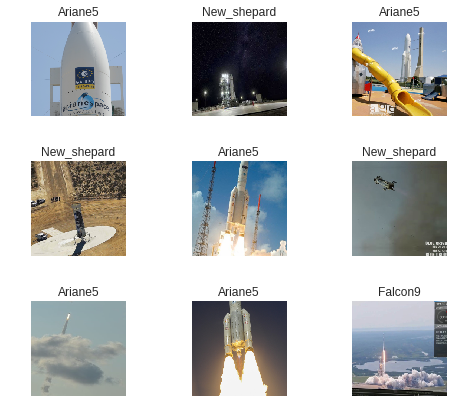

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes), data.c

['Ariane5', 'Falcon9', 'New_shepard', 'SaturnV', 'Soyouz']


(5, 5)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 97148133.54it/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,2.021434,1.487587,0.625000
2,1.603040,0.759513,0.271552
3,1.231395,0.467211,0.163793
4,0.985640,0.389241,0.150862
5,0.813717,0.353749,0.125000
6,0.696129,0.339531,0.120690
7,0.600353,0.316214,0.120690
8,0.528274,0.304320,0.120690
9,0.479195,0.298313,0.116379
10,0.435318,0.298843,0.112069


In [0]:
learn.save("stage-1")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

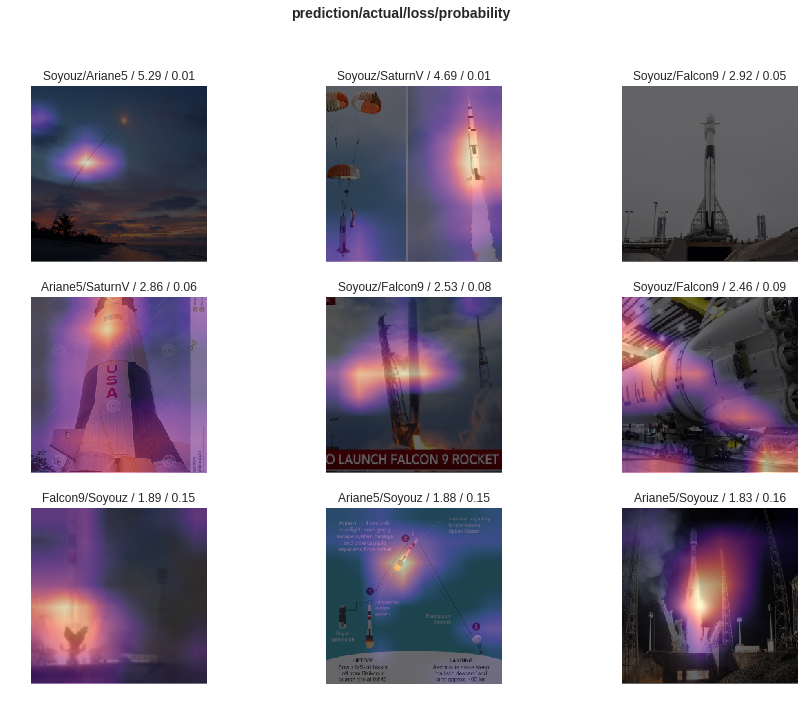

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

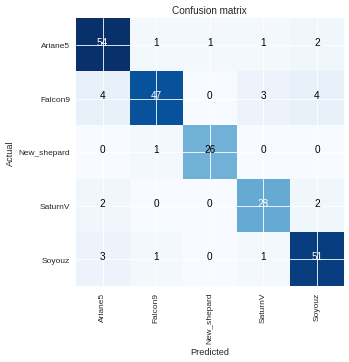

In [0]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('Falcon9', 'Ariane5', 4),
 ('Falcon9', 'Soyouz', 4),
 ('Falcon9', 'SaturnV', 3),
 ('Soyouz', 'Ariane5', 3)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.264298,0.540254,0.163793


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (574 items)
x: ImageItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
SaturnV,SaturnV,SaturnV,SaturnV,SaturnV
Path: rocket_dataset;

Valid: LabelList (232 items)
x: ImageItemList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
SaturnV,SaturnV,SaturnV,SaturnV,SaturnV
Path: rocket_dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06


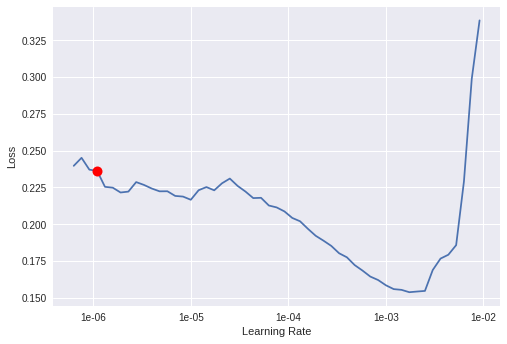

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(12, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.234299,0.295625,0.103448
2,0.237814,0.274994,0.090517
3,0.201096,0.250837,0.086207
4,0.175479,0.232759,0.090517
5,0.154322,0.251617,0.090517
6,0.137088,0.235056,0.073276
7,0.123657,0.211191,0.064655
8,0.110996,0.206359,0.073276
9,0.103581,0.203499,0.077586
10,0.090365,0.202030,0.077586


In [0]:
learn.save('after_unfreeze')

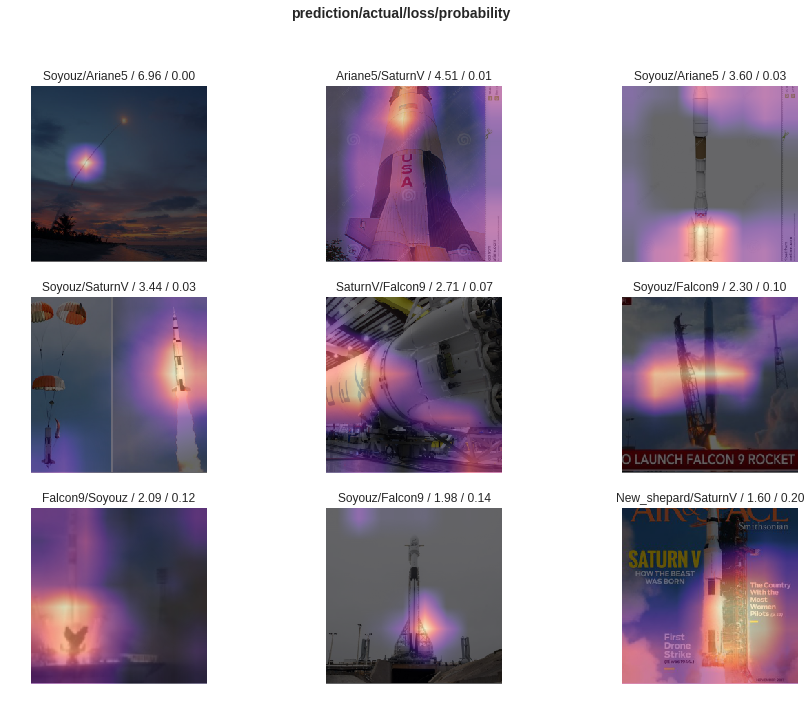

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

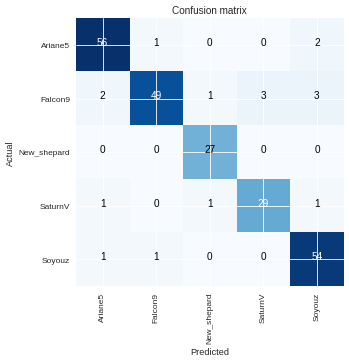

In [0]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)